In [1]:
#Phase 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
#normalized.csv
#not_normalized.csv
#state.csv
x = input("Type your file path to select csv file to be modeled as data values:")
y = input("Please pass in some auxilary data:")
z = input("Please add about your states population:")
nor= pd.read_csv(x,index_col=0)
df= pd.read_csv(y,index_col=0)
population = pd.read_csv(z,index_col=0)

#we may want to adjust our regression model in phase 2. Let's take a look at plotting population and death


Type your file path to select csv file to be modeled as data values:normalized.csv
Please pass in some auxilary data:not_normalized.csv
Please add about your states population:state.csv



Should our machine learning model use normalized data set or the non-normalized data?
Well it depends. In phase 1, I blindly mentionted the fact that you and I may not experience gun violence because of it's low probability. Well, we have seen that this issue can hit close to home, as recently a shooting in Buffalo took place.



Year
Illinois          1.277770e+07
California        3.922381e+07
Texas             2.836776e+07
Florida           2.095918e+07
Pennsylvania      1.283909e+07
Ohio              1.168239e+07
New York          1.969372e+07
North Carolina    1.028098e+07
Louisiana         4.660167e+06
Georgia           1.044975e+07
dtype: float64

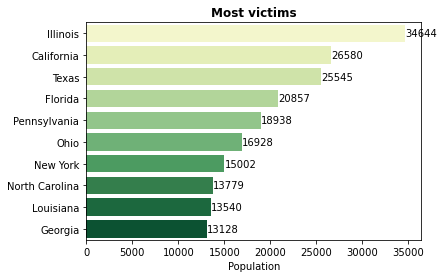

In [2]:
#Top ten states with the most gun victims in the past eight years. 
x = df.transpose().sum().sort_values(ascending = False).head(10)
y = nor.transpose().sum().sort_values(ascending = False).head(10)
ax = sns.barplot(x = x, y = x.keys(), palette = "YlGn" )
ax.bar_label(ax.containers[0]);
plt.xlabel('Population')
ax.set_title('Most victims', fontweight = 'bold')

display(population.mean(axis=1).filter(x.index))


#Louisiana has a smaller population than the others states

Text(0.5, 0, 'Normalized')

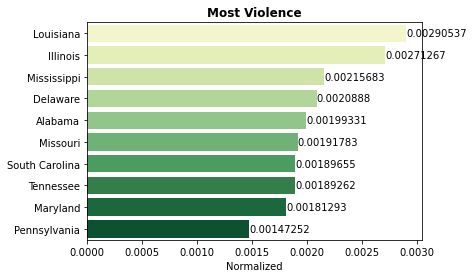

In [3]:
#Top ten states with the most gun victims per capita
ax = sns.barplot(x = y, y = y.keys(), palette = "YlGn" )
ax.bar_label(ax.containers[0]);
ax.set_title('Most Violence', fontweight = 'bold')
plt.xlabel('Normalized')

In [4]:
display(population.mean(axis=1)['New York'])
display(population.mean(axis=1)['Louisiana'])
display(population.mean(axis=1)['Georgia'])

19693723.625

4660166.75

10449746.625

Text(0.5, 1.0, 'Least victims')

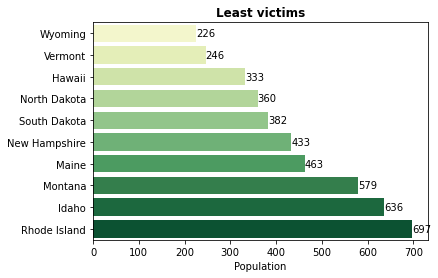

In [5]:
xp = df.transpose().sum().sort_values(ascending = True).head(10)
yp = nor.transpose().sum().sort_values(ascending = True).head(10)
ax = sns.barplot(x = xp, y = xp.keys(), palette = "YlGn" )
ax.bar_label(ax.containers[0]);
plt.xlabel('Population')
ax.set_title('Least victims', fontweight = 'bold')




Text(0.5, 1.0, 'Least violent')

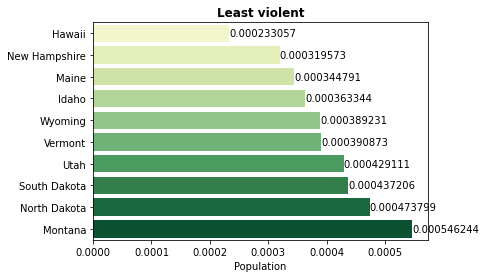

In [6]:
ax = sns.barplot(x = yp, y = yp.keys(), palette = "YlGn" )
ax.bar_label(ax.containers[0]);
plt.xlabel('Population')
ax.set_title('Least violent', fontweight = 'bold')

If we look at the variables x and y, we can see that they paint a different pictures for which states have a higher number of gun violence.
Non-Normalized vs Normalized
Illionis   -     Louisiana
Califonria -     Illinois
Texas      -     Mississippi
Florida    -     Delaware
Pennsylvania -   Alabama
Ohio         -   Missouri
New York     -   South Carolina
North Carolina - Tennessee
Louisiana     -  Maryland
Georgia -        Pennsylvania
The 3 States that are ranked high in both data sets are Illinois, Louisiana, and Pennsylvania. I would reccomend the user pay attention to them.

In [7]:
#Victims Not in gun violence
print(x.index.difference(y.index))
#Violence Not in gun victims
print(y.index.difference(x.index))

Index(['California', 'Florida', 'Georgia', 'New York', 'North Carolina',
       'Ohio', 'Texas'],
      dtype='object')
Index(['Alabama', 'Delaware', 'Maryland', 'Mississippi', 'Missouri',
       'South Carolina', 'Tennessee'],
      dtype='object')


In [8]:
#Not in gun violence
print(xp.index.difference(yp.index))
#Not in gun victims
print(yp.index.difference(xp.index))

Index(['Rhode Island'], dtype='object')
Index(['Utah'], dtype='object')


These are states that are not in both the violent and victims data frames. It's an intereseting avenue to explore.

0.6755075175202967

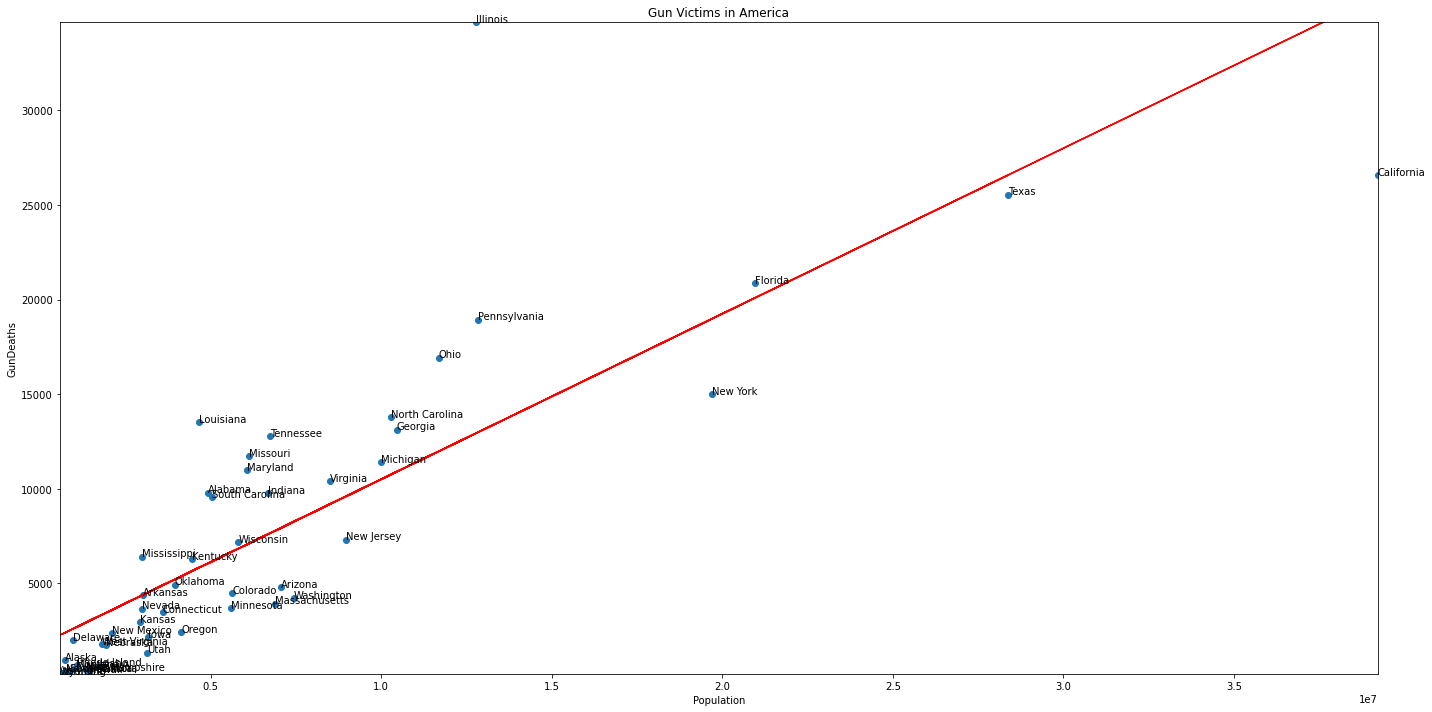

In [9]:
#this one is strictly total deaths without population taken into account
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=20,10
plt.xlim(580413, 39223812)
plt.ylim(226, 34644)

#Victims Sum by 50 states
Y = df.sum(axis=1)
#Population mean across 50 states
X = population.mean(axis=1,numeric_only=True)
y = Y.values.reshape(-1,1)
x = X.values.reshape(-1,1)

line = LinearRegression()
line.fit(x,y)
plt.scatter(x,y)
plt.xlabel('Population')
plt.ylabel('GunDeaths')
plt.title('Gun Victims in America')
i = 0
for key in Y.keys():
    plt.annotate(key, (x[i], y[i]))
    i +=1
plt.plot(x,line.predict(x),color='red')
plt.tight_layout()
line.score(x,y)








0.6487352385943751

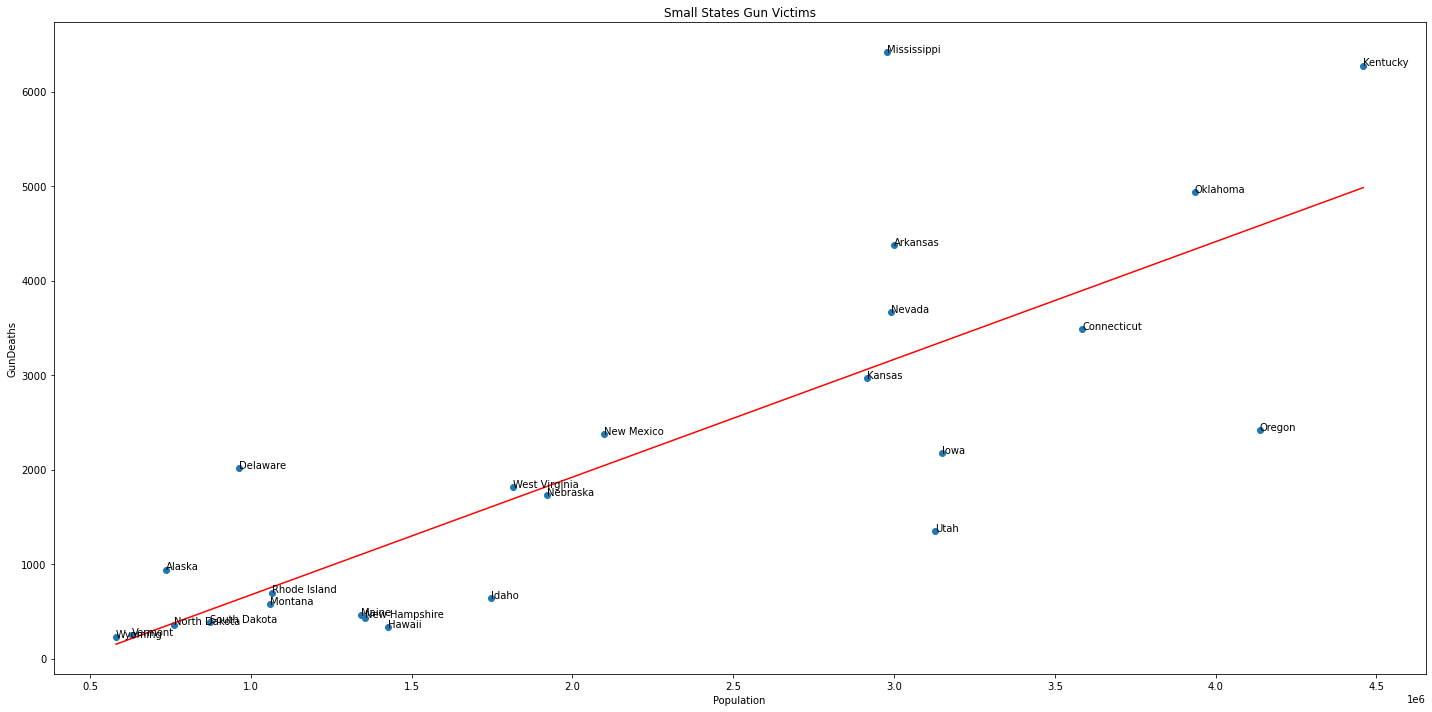

In [10]:
#We take the sum of the gun victims over the past eight years and take the population average per state in this model
#Small States
X = population.mean(axis=1).sort_values().head(25)
Y = df.sum(axis=1,numeric_only=True).filter(X.index)
x = X.values.reshape(-1,1)
y = Y.values.reshape(-1,1)
               
line = LinearRegression()
line.fit(x,y)
plt.scatter(x,y)
plt.xlabel('Population')
plt.ylabel('GunDeaths')
plt.title('Small States Gun Victims')
i = 0
for key in Y.keys():
    plt.annotate(key, (x[i], y[i]))
    i +=1
plt.plot(x,line.predict(x),color='red')
plt.tight_layout()
line.score(x,y)

0.48841259558475014

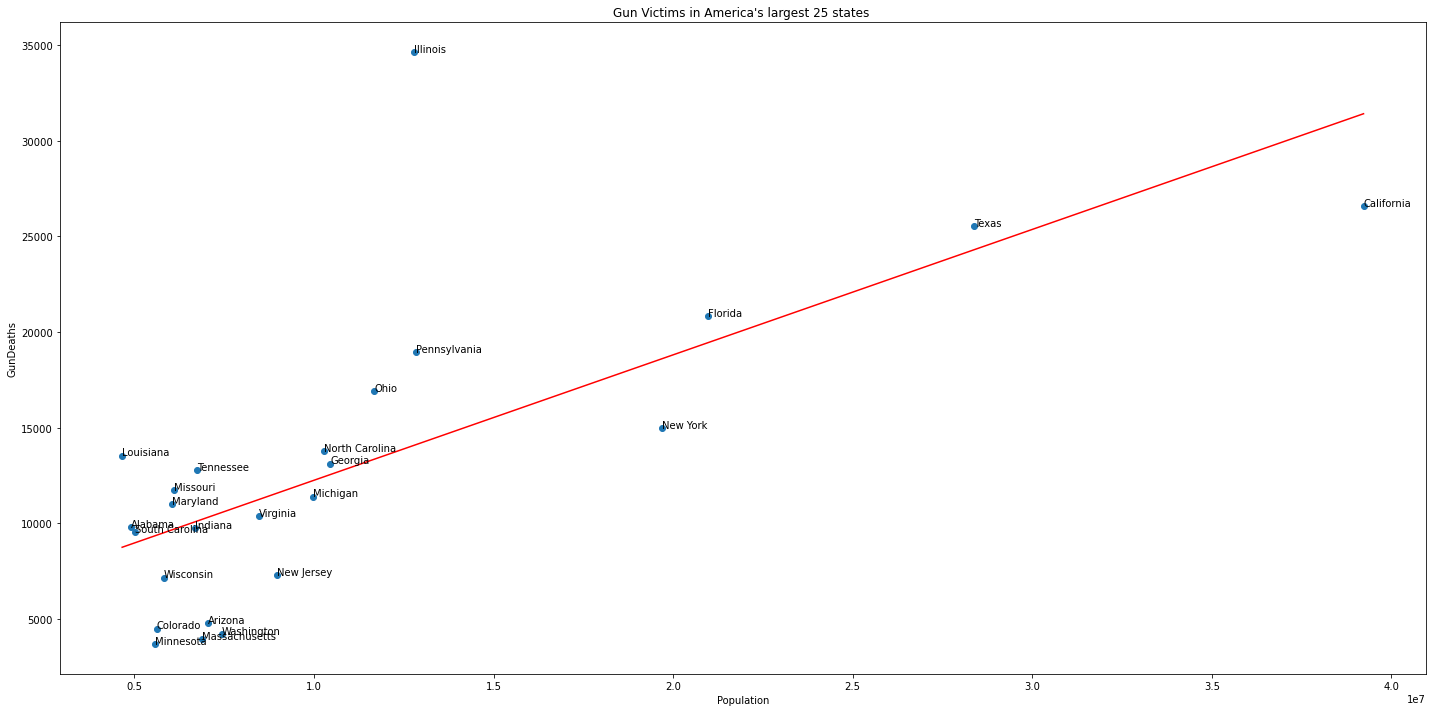

In [11]:
#Once again we take the population mean and victim sum
#Large States
X = population.mean(axis=1).sort_values().tail(25)
Y = df.sum(axis=1,numeric_only=True).filter(X.index)
x = X.values.reshape(-1,1)
y = Y.values.reshape(-1,1)


line = LinearRegression()
line.fit(x,y)
plt.scatter(x,y)
plt.xlabel('Population')
plt.ylabel('GunDeaths')
plt.title('Gun Victims in America\'s largest 25 states ')
i = 0
for key in Y.keys():
    plt.annotate(key, (x[i], y[i]))
    i +=1
plt.plot(x,line.predict(x),color='red')
plt.tight_layout()
line.score(x,y)

0.5680222306680343

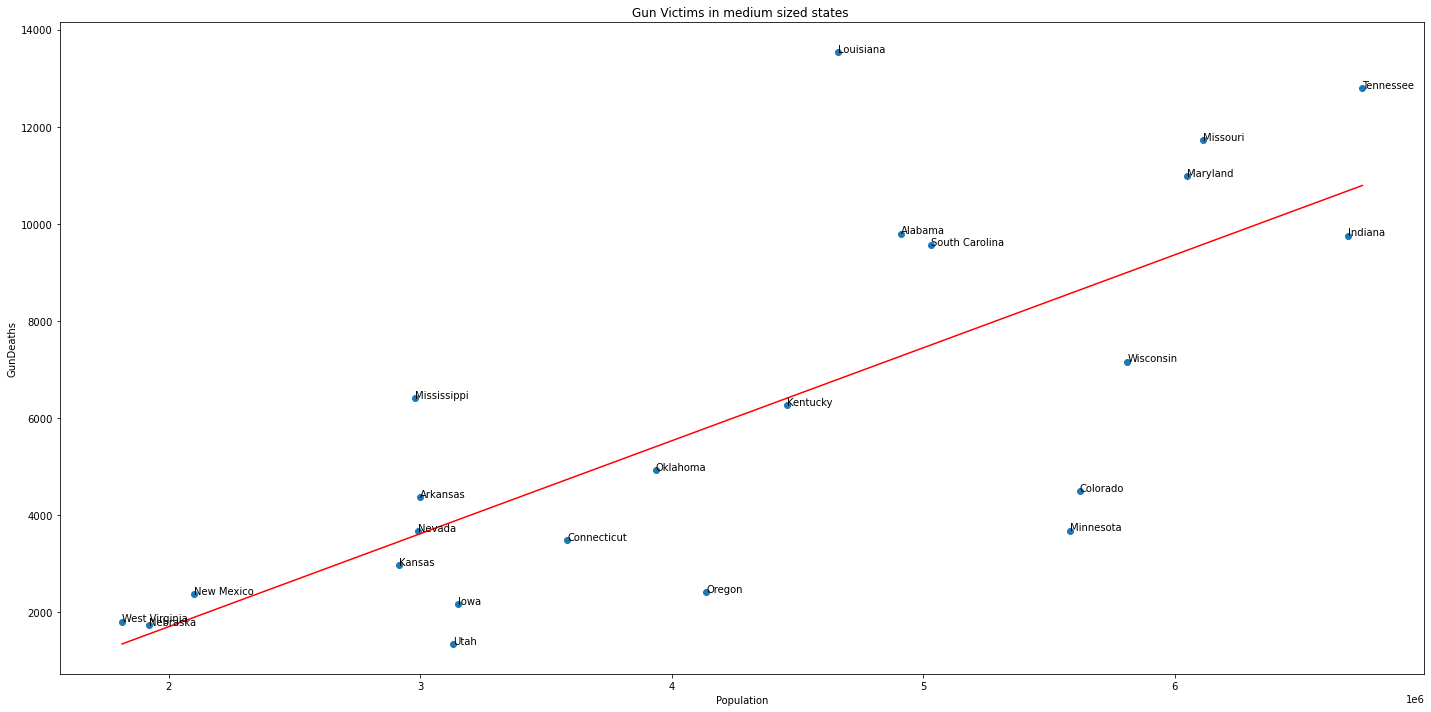

In [12]:
#Medium States
X = population.mean(axis=1).sort_values().iloc[12:35]
Y = df.sum(axis=1,numeric_only=True).filter(X.index)
x = X.values.reshape(-1,1)
y = Y.values.reshape(-1,1)


line = LinearRegression()
line.fit(x,y)
plt.scatter(x,y)
plt.xlabel('Population')
plt.ylabel('GunDeaths')
plt.title('Gun Victims in medium sized states ')
i = 0
for key in Y.keys():
    plt.annotate(key, (x[i], y[i]))
    i +=1
plt.plot(x,line.predict(x),color='red')
plt.tight_layout()
line.score(x,y)

Now let's shift our attention to gun violence when our data factors into account population and see the relationship between violence and population

0.004623318172035651

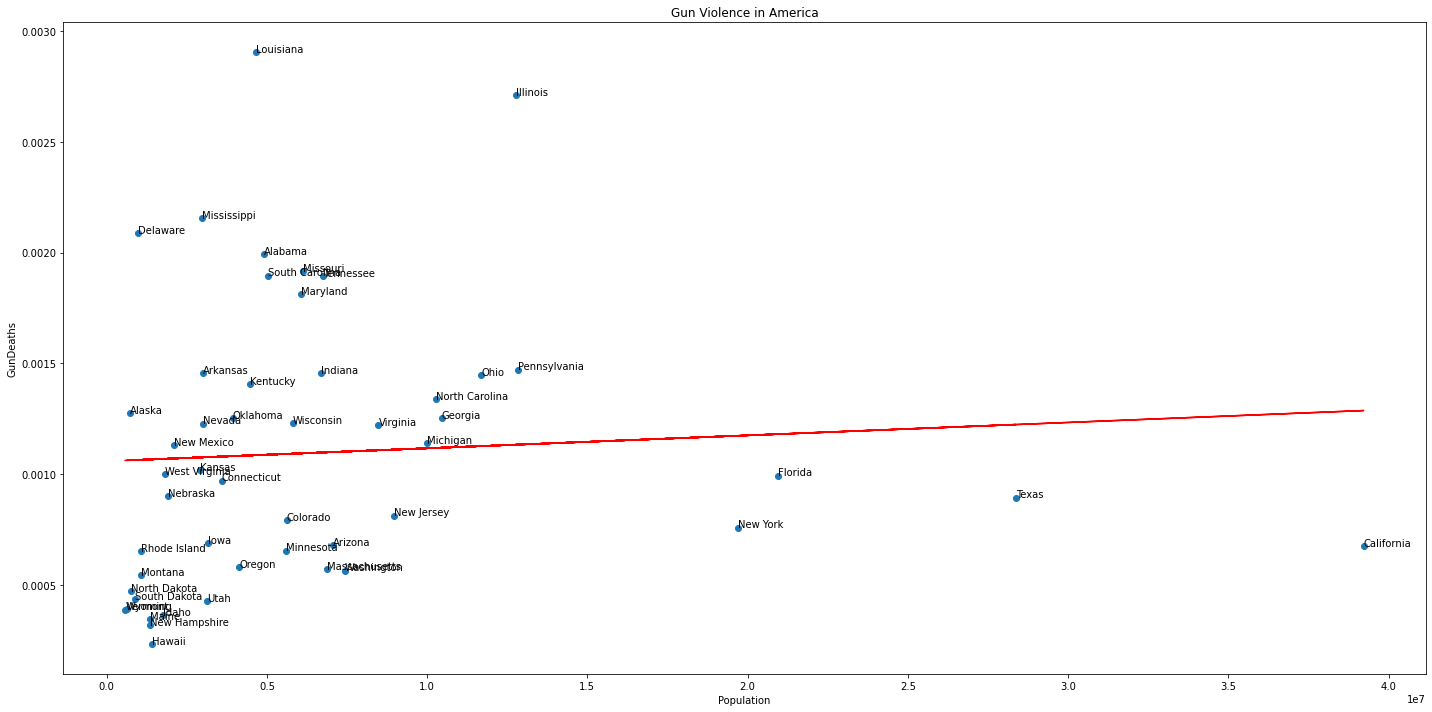

In [13]:
#Should we use sum or mean for the normalized data across the eight years?
Y = nor.sum(axis=1,numeric_only=True)
X = population.mean(axis=1,numeric_only=True)
y = Y.values.reshape(-1,1)
x = X.values.reshape(-1,1)

line = LinearRegression()
line.fit(x,y)
plt.scatter(x,y)
plt.xlabel('Population')
plt.ylabel('GunDeaths')
plt.title('Gun Violence in America')
i = 0
for key in Y.keys():
    plt.annotate(key, (x[i], y[i]))
    i +=1
plt.plot(x,line.predict(x),color='red')
plt.tight_layout()
line.score(x,y)

0.12398489325565565

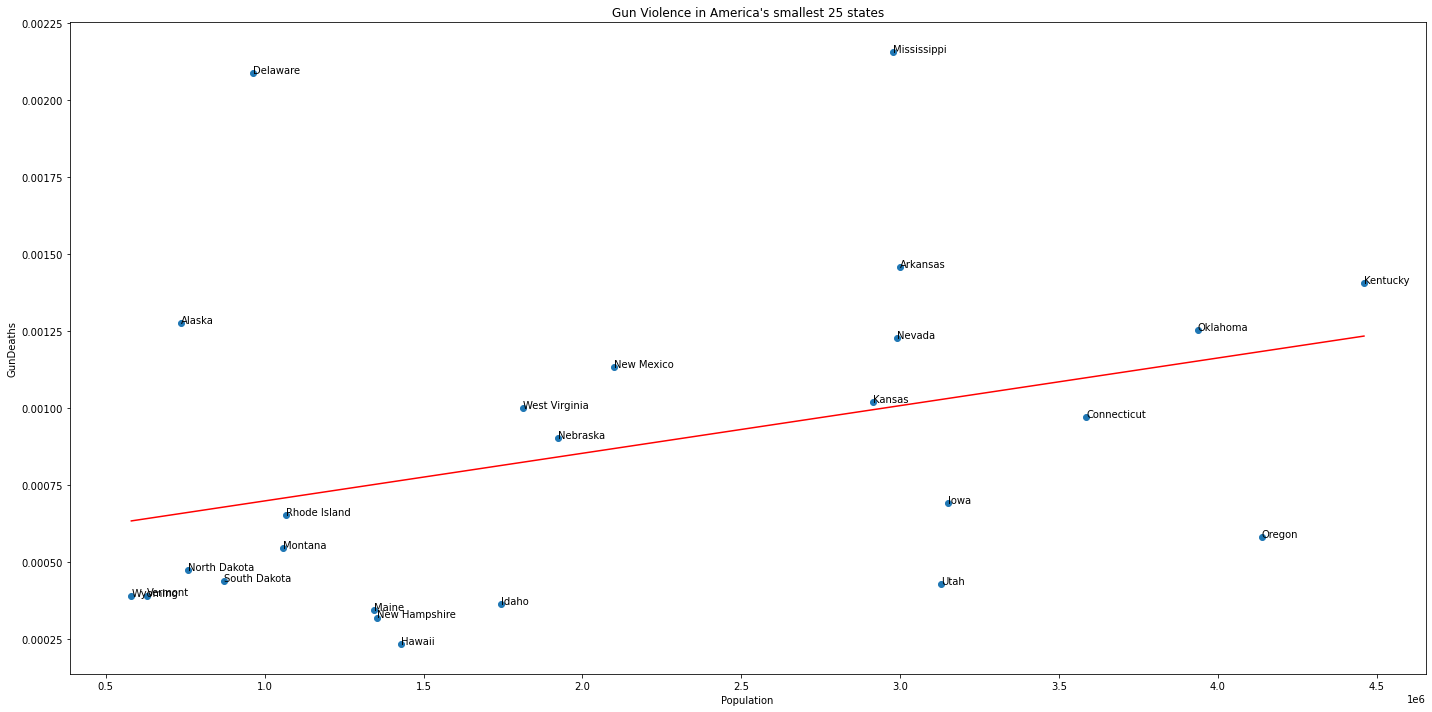

In [14]:

X = population.mean(axis=1,numeric_only=True).sort_values().head(25)
Y = nor.sum(axis=1,numeric_only=True).filter(X.index)
x = X.values.reshape(-1,1)
y = Y.values.reshape(-1,1)

line = LinearRegression()
line.fit(x,y)
plt.scatter(x,y)
plt.xlabel('Population')
plt.ylabel('GunDeaths')
plt.title('Gun Violence in America\'s smallest 25 states')
i = 0
for key in Y.keys():
    plt.annotate(key, (x[i], y[i]))
    i +=1
plt.plot(x,line.predict(x),color='red')
plt.tight_layout()
line.score(x,y)

0.10116278630870668

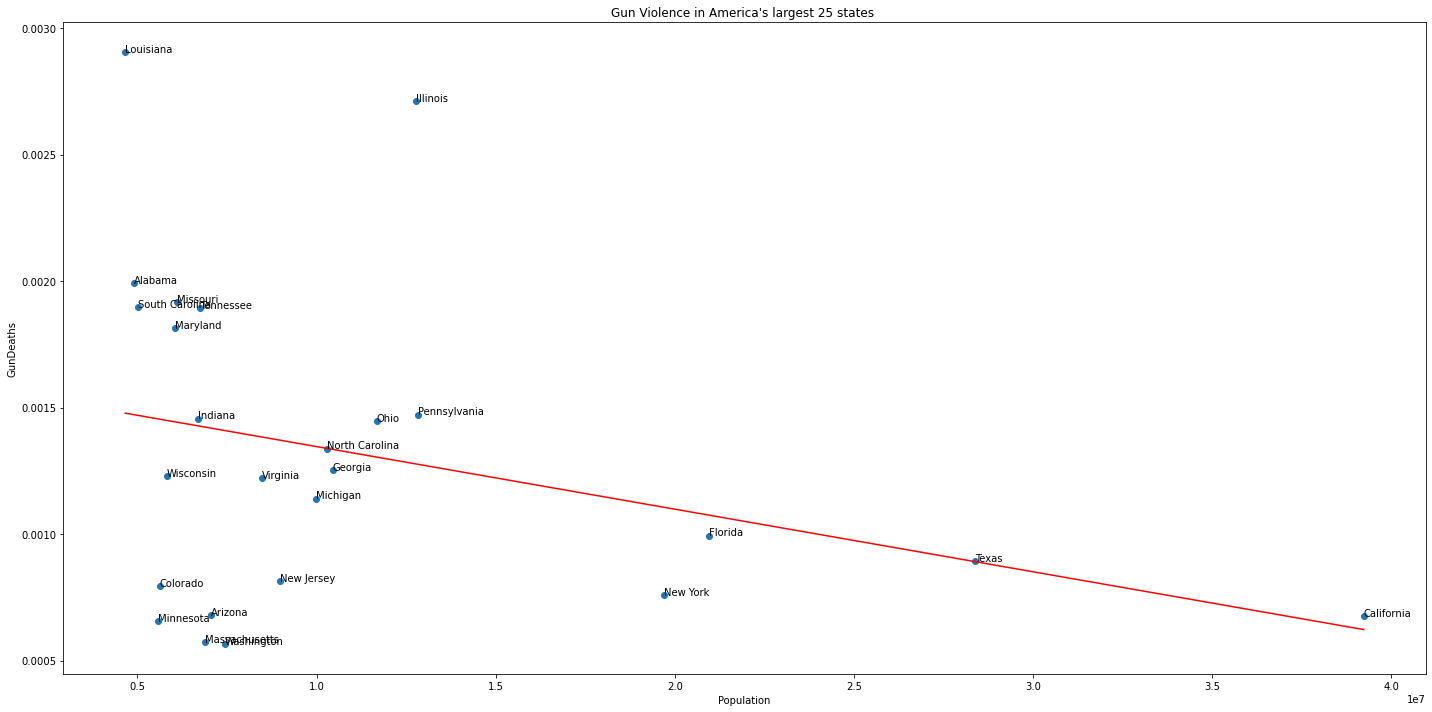

In [15]:
X = population.mean(axis=1,numeric_only=True).sort_values().tail(25)
Y = nor.sum(axis=1,numeric_only=True).filter(X.index)
x = X.values.reshape(-1,1)
y = Y.values.reshape(-1,1)


line = LinearRegression()
line.fit(x,y)
plt.scatter(x,y)
plt.xlabel('Population')
plt.ylabel('GunDeaths')
plt.title('Gun Violence in America\'s largest 25 states ')
i = 0
for key in Y.keys():
    plt.annotate(key, (x[i], y[i]))
    i +=1
plt.plot(x,line.predict(x),color='red')
plt.tight_layout()
line.score(x,y)

0.12053000646928413

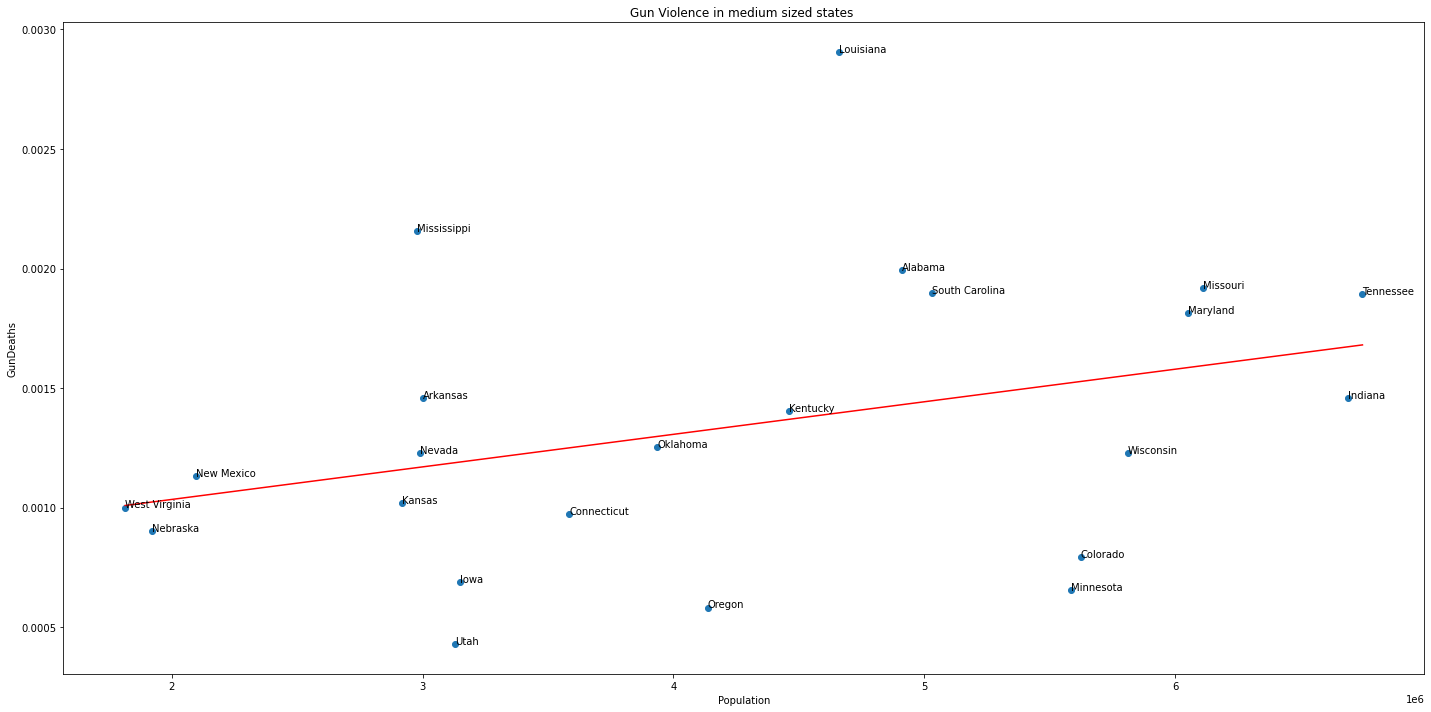

In [16]:
X = population.mean(axis=1,numeric_only=True).sort_values().iloc[12:35]
x = X.values.reshape(-1,1)
Y = nor.sum(axis=1).filter(X.index)
y = Y.values.reshape(-1,1)

line = LinearRegression()
line.fit(x,y)
plt.scatter(x,y)
plt.xlabel('Population')
plt.ylabel('GunDeaths')
plt.title('Gun Violence in medium sized states ')
i = 0
for key in Y.keys():
    plt.annotate(key, (x[i], y[i]))
    i +=1
plt.plot(x,line.predict(x),color='red')
plt.tight_layout()
line.score(x,y)